In [43]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
import skbio
current_file="rearrangement_updated_32720.csv"

In [2]:
df2=pd.read_csv(current_file)
div=pd.read_csv(current_file)
reyni=pd.read_csv(current_file)
print(df2.head())
print(div.head())

      type  NHLC_WT  NHLC_1A  NHLC_1B  NHLC_2A  NHLC_2B  NHLC_3A  NHLC_3B  \
0  p1p7del       12        0       23        0        6        0        6   
1  p1p6del       34        0       18        0       10        0       18   
2  p1p4del        0        0        0        0        0        0       13   
3  p1p5del        0        0        0        0        0        0        0   
4  p2p6del       13        0        0        0        0        0        0   

   NHLC_4B  NHLC_4C  ...  NHLC_17A  NHLC_17B  NHLC_18A  NHLC_18B  NHLC_19A  \
0        0        0  ...         0        61         2         0         0   
1        6        0  ...         4         2        53         0         8   
2        0        0  ...         0         0         0         0         0   
3        0        0  ...         4         0         0         0         0   
4        0        2  ...         0         0         4         0         0   

   NHLC_19B  NHLC_20A  NHLC_20B  NHLC_21A  NHLC_21B  
0         0   

In [3]:
df2.set_index("type", inplace=True)

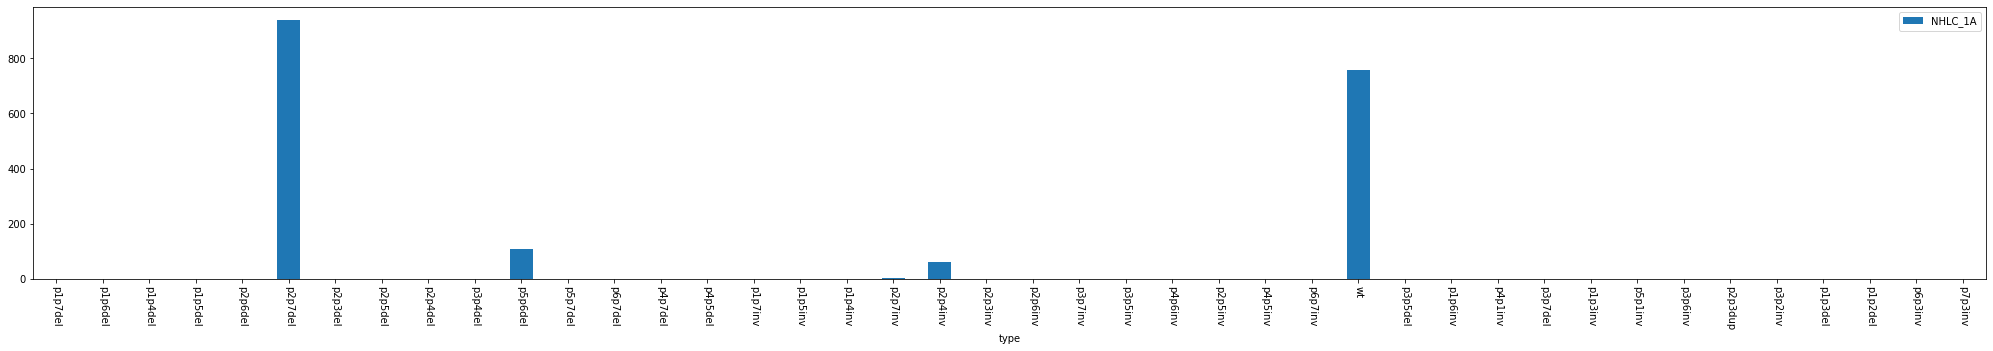

In [4]:
ax = df2.plot.bar(y="NHLC_1A", figsize = (35,5), rot=-90)

In [5]:
#adding one to every field for psuedocounting purposes
KLdf = df2
KLdf = KLdf.astype("float64")
for key, row in KLdf.iteritems():
    for key2, row2 in row.iteritems():
        KLdf.loc[key2][key] += 1
        
for key, row in KLdf.iteritems():
    for key2, row2 in row.iteritems():
        if KLdf.loc[key2][key] <= 0:
            print("error in",key2,key)

In [6]:
#Convert dataframes to frequencies of each column
for key, row in KLdf.iteritems():
    for key2, row2 in row.iteritems():
        value = KLdf.loc[key2][key]
        KLdf.loc[key2][key] = (value / sum(row))

In [7]:
# calculating KL distance between two distrubtions. Distance(P||Q) = summation[Pi*Log2(Pi/Qi)]

KLresults = {}
for key, row in KLdf.iteritems():
    for key2, row2 in KLdf.iteritems():
        if key == key2:
            continue
        data = row * np.log2(row/row2)
        resultkey = key + " " + key2
        reversekey = key2 + " " + key
        if reversekey in KLresults:
            KLresults[reversekey] += sum(data)
        else:
            KLresults[resultkey] = sum(data)

In [8]:
resultframe = pd.DataFrame.from_dict(KLresults, orient = 'index', columns = ["KL_Distance"])

In [9]:
#Showing how to pull values from a specific sample. NHLC_16B as example:
print(resultframe[resultframe.index.str.contains("16B-")])

                   KL_Distance
NHLC_16B-NHLC_WT      9.973539
NHLC_16B-NHLC_1A      8.381863
NHLC_16B-NHLC_1B      8.424590
NHLC_16B-NHLC_2A      9.145639
NHLC_16B-NHLC_2B      9.235000
NHLC_16B-NHLC_3A      8.904522
NHLC_16B-NHLC_3B      7.660103
NHLC_16B-NHLC_4B      9.271300
NHLC_16B-NHLC_4C     10.505233
NHLC_16B-NHLC_5A      8.666042
NHLC_16B-NHLC_5B      8.718312
NHLC_16B-NHLC_6A      8.165736
NHLC_16B-NHLC_6B      8.581205
NHLC_16B-NHLC_7A      9.088932
NHLC_16B-NHLC_7B      7.892606
NHLC_16B-NHLC_8A      9.103563
NHLC_16B-NHLC_8B      9.530627
NHLC_16B-NHLC_9A      9.292754
NHLC_16B-NHLC_9B      9.074203
NHLC_16B-NHLC_10A     8.857410
NHLC_16B-NHLC_10B     8.996783
NHLC_16B-NHLC_11A    11.690305
NHLC_16B-NHLC_11B     9.891473
NHLC_16B-NHLC_13A     6.635071
NHLC_16B-NHLC_13B     9.163309
NHLC_16B-NHLC_14A     9.095496
NHLC_16B-NHLC_14B     9.131550
NHLC_16B-NHLC_15D     9.725032
NHLC_16B-NHLC_16A     4.209408
NHLC_16B-NHLC_17A     9.513216
NHLC_16B-NHLC_17B    12.299153
NHLC_16B

,KL_Distance
NHLC_WT,1.130633
NHLC_1A,5.670323
NHLC_1B,5.135185
NHLC_2A,1.326961
NHLC_2B,2.031821
NHLC_3A,1.226918
NHLC_3B,1.180147
NHLC_4B,0.744476
NHLC_4C,6.793989
NHLC_5A,2.842145


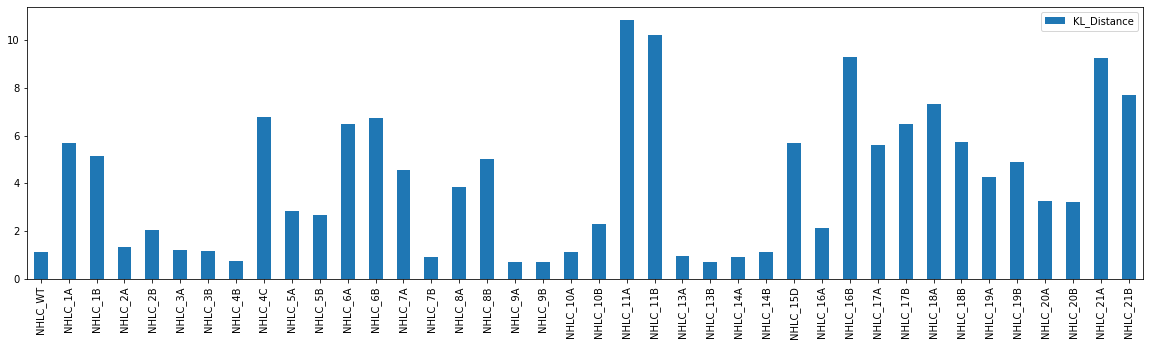

In [10]:
#Averaging KL Diversity per sample to make data more easily digestable
groups = {}
groupcount = {}
finalavg = {}
for key, row in resultframe.iteritems():
    for key2, row2 in row.iteritems():
        group = key2.split("-")[0]
        groups[group] = 0
        groupcount[group] = 0
    for key2, row2 in row.iteritems():
        group = key2.split("-")[0]
        groups[group] += row2
        groupcount[group] += 1

for key,value in groups.items():
    finalavg[key] = value/groupcount[key]

avgresults = pd.DataFrame.from_dict(finalavg, orient = 'index', columns = ["KL_Distance"])
display(avgresults)
ax = avgresults.plot.bar(y="KL_Distance", figsize = (20,5), rot=90)

In [11]:
print(skbio.diversity.get_alpha_diversity_metrics())
print(skbio.diversity.get_beta_diversity_metrics())

['ace', 'berger_parker_d', 'brillouin_d', 'chao1', 'chao1_ci', 'dominance', 'doubles', 'enspie', 'esty_ci', 'faith_pd', 'fisher_alpha', 'gini_index', 'goods_coverage', 'heip_e', 'kempton_taylor_q', 'lladser_ci', 'lladser_pe', 'margalef', 'mcintosh_d', 'mcintosh_e', 'menhinick', 'michaelis_menten_fit', 'observed_otus', 'osd', 'pielou_e', 'robbins', 'shannon', 'simpson', 'simpson_e', 'singles', 'strong']
['unweighted_unifrac', 'weighted_unifrac']


In [12]:
#Preparing Diverity Calculations. Obtaining a clean dataframe without frequencies.
display(div)
div = div.drop("type", axis=1)
div = div.transpose()
display(div)

,type,NHLC_WT,NHLC_1A,NHLC_1B,NHLC_2A,NHLC_2B,NHLC_3A,NHLC_3B,NHLC_4B,NHLC_4C,...,NHLC_17A,NHLC_17B,NHLC_18A,NHLC_18B,NHLC_19A,NHLC_19B,NHLC_20A,NHLC_20B,NHLC_21A,NHLC_21B
0,p1p7del,12,0,23,0,6,0,6,0,0,...,0,61,2,0,0,0,0,3,0,2
1,p1p6del,34,0,18,0,10,0,18,6,0,...,4,2,53,0,8,0,0,0,59,0
2,p1p4del,0,0,0,0,0,0,13,0,0,...,0,0,0,0,0,0,0,0,0,0
3,p1p5del,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,1,0
4,p2p6del,13,0,0,0,0,0,0,0,2,...,0,0,4,0,0,0,746,743,178,199
5,p2p7del,0,940,1007,2,9,0,0,0,0,...,2,8,1132,0,0,0,3,0,2,2
6,p2p3del,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,p2p5del,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,p2p4del,0,0,0,0,0,0,0,0,0,...,463,461,1,0,0,0,0,0,0,0
9,p3p4del,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
NHLC_WT,12,34,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
NHLC_1A,0,0,0,0,0,940,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NHLC_1B,23,18,0,0,0,1007,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NHLC_2A,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NHLC_2B,6,10,0,0,0,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NHLC_3A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NHLC_3B,6,18,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NHLC_4B,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NHLC_4C,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NHLC_5A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
diversity_results= pd.DataFrame()
diversity_results["Observed_Otus"]=skbio.diversity.alpha_diversity("observed_otus",div, ids=div.index)
diversity_results["Simpsons_Index"]=skbio.diversity.alpha_diversity("simpson",div, ids=div.index)
diversity_results["Simspons_Evenness_Measure_E"]=skbio.diversity.alpha_diversity("simpson_e",div, ids=div.index)
diversity_results["Shannon_Entropy"]=skbio.diversity.alpha_diversity("shannon",div, ids=div.index)
diversity_results["Fisher_Alpha"]=skbio.diversity.alpha_diversity("fisher_alpha",div, ids=div.index)


In [14]:
display(diversity_results)
#diversity_results.plot(figsize = (40,5), rot=90)

,Observed_Otus,Simpsons_Index,Simspons_Evenness_Measure_E,Shannon_Entropy,Fisher_Alpha
NHLC_WT,10,0.090139,0.109907,0.399480,1.356342
NHLC_1A,5,0.576890,0.472690,1.428609,0.624927
NHLC_1B,10,0.579202,0.237644,1.471852,1.360434
NHLC_2A,3,0.005064,0.335030,0.027861,0.338962
NHLC_2B,6,0.027215,0.171329,0.133417,0.733263
NHLC_3A,4,0.262532,0.338998,0.641996,0.479202
NHLC_3B,7,0.260915,0.193289,0.718231,0.886243
NHLC_4B,4,0.063798,0.267036,0.223709,0.463028
NHLC_4C,6,0.558409,0.377423,1.448958,0.704713
NHLC_5A,3,0.437466,0.592556,1.071908,0.350891


In [15]:
#Convert reyni dataframes to frequencies of each column
reyni.set_index("type", inplace=True)
display(reyni)
reynisums=pd.Series(reyni.sum())
reynifreq = reyni / reynisums


,NHLC_WT,NHLC_1A,NHLC_1B,NHLC_2A,NHLC_2B,NHLC_3A,NHLC_3B,NHLC_4B,NHLC_4C,NHLC_5A,...,NHLC_17A,NHLC_17B,NHLC_18A,NHLC_18B,NHLC_19A,NHLC_19B,NHLC_20A,NHLC_20B,NHLC_21A,NHLC_21B
type,,,,,,,,,,,,,,,,,,,,,
p1p7del,12,0,23,0,6,0,6,0,0,0,...,0,61,2,0,0,0,0,3,0,2
p1p6del,34,0,18,0,10,0,18,6,0,0,...,4,2,53,0,8,0,0,0,59,0
p1p4del,0,0,0,0,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
p1p5del,0,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,1,0
p2p6del,13,0,0,0,0,0,0,0,2,0,...,0,0,4,0,0,0,746,743,178,199
p2p7del,0,940,1007,2,9,0,0,0,0,0,...,2,8,1132,0,0,0,3,0,2,2
p2p3del,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
p2p5del,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
p2p4del,0,0,0,0,0,0,0,0,0,0,...,463,461,1,0,0,0,0,0,0,0


In [16]:
alphalist = [0,.99999,2,3,4]
reyniresults={}
for column in reynifreq:
    #print(reynifreq[column])
    listresults=[]
    for alpha in alphalist:
        columnsum=0
        for row in reynifreq[column]:
            if row > 0:
                columnsum+=row**alpha
                #print(columnsum)
            else:
                continue
        columnsum=columnsum**(1/(1-alpha))
        listresults.append(columnsum)
    reyniresults[column]=listresults
display(reyniresults)

{'NHLC_WT': [10.0,
  1.3190398522164983,
  1.099068439664759,
  1.0737617700339606,
  1.0653069206766992],
 'NHLC_1A': [5.0,
  2.69187681746046,
  2.3634515888099674,
  2.2635027677913553,
  2.217214703802661],
 'NHLC_1B': [10.0,
  2.7737872856002377,
  2.3764355976789697,
  2.288052182006713,
  2.25247897460591],
 'NHLC_2A': [3.0,
  1.0194999163394625,
  1.0050897581107012,
  1.0038175980697026,
  1.0033927042585002],
 'NHLC_2B': [6.0,
  1.0968912120843421,
  1.0279762679393811,
  1.0209459622090453,
  1.0185972102948422],
 'NHLC_3A': [4.0,
  1.5604899785431168,
  1.3559908304547093,
  1.2833586767851504,
  1.251079569038125],
 'NHLC_3B': [7.0,
  1.6451704156448823,
  1.3530236880319233,
  1.2755348658626675,
  1.2434202293464112],
 'NHLC_4B': [4.0,
  1.1677344933647884,
  1.0681459707597019,
  1.0514439848733284,
  1.0456135761517165],
 'NHLC_4C': [6.0,
  2.7301166024776493,
  2.2645384831184248,
  2.0756369524637703,
  1.9749584998463847],
 'NHLC_5A': [3.0,
  2.1022169197214495,
  1

In [17]:
display(reynifreq)

,NHLC_WT,NHLC_1A,NHLC_1B,NHLC_2A,NHLC_2B,NHLC_3A,NHLC_3B,NHLC_4B,NHLC_4C,NHLC_5A,...,NHLC_17A,NHLC_17B,NHLC_18A,NHLC_18B,NHLC_19A,NHLC_19B,NHLC_20A,NHLC_20B,NHLC_21A,NHLC_21B
type,,,,,,,,,,,,,,,,,,,,,
p1p7del,0.005561,0.000000,0.010864,0.000000,0.002287,0.000000,0.002515,0.000000,0.000000,0.000000,...,0.000000,0.020132,0.000772,0.000000,0.000000,0.000000,0.000000,0.001304,0.000000,0.000438
p1p6del,0.015755,0.000000,0.008503,0.000000,0.003812,0.000000,0.007544,0.002295,0.000000,0.000000,...,0.001267,0.000660,0.020448,0.000000,0.003338,0.000000,0.000000,0.000000,0.012672,0.000000
p1p4del,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005448,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
p1p5del,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000215,0.000000
p2p6del,0.006024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000569,0.000000,...,0.000000,0.000000,0.001543,0.000000,0.000000,0.000000,0.330235,0.322903,0.038230,0.043593
p2p7del,0.000000,0.504292,0.475673,0.000846,0.003431,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000633,0.002640,0.436728,0.000000,0.000000,0.000000,0.001328,0.000000,0.000430,0.000438
p2p3del,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
p2p5del,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
p2p4del,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.146612,0.152145,0.000386,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:
reynidf = pd.DataFrame.from_dict(data=reyniresults, orient='columns')
reynidfl = pd.DataFrame.from_dict(data=reyniresults, orient='index', columns=alphalist)
reynidft = reynidfl.transpose()
display(reynidfl)
display(reynidft)

,0.00000,0.99999,2.00000,3.00000,4.00000
NHLC_WT,10.0,1.319040,1.099068,1.073762,1.065307
NHLC_1A,5.0,2.691877,2.363452,2.263503,2.217215
NHLC_1B,10.0,2.773787,2.376436,2.288052,2.252479
NHLC_2A,3.0,1.019500,1.005090,1.003818,1.003393
NHLC_2B,6.0,1.096891,1.027976,1.020946,1.018597
NHLC_3A,4.0,1.560490,1.355991,1.283359,1.251080
NHLC_3B,7.0,1.645170,1.353024,1.275535,1.243420
NHLC_4B,4.0,1.167734,1.068146,1.051444,1.045614
NHLC_4C,6.0,2.730117,2.264538,2.075637,1.974958
NHLC_5A,3.0,2.102217,1.777669,1.640926,1.571772


,NHLC_WT,NHLC_1A,NHLC_1B,NHLC_2A,NHLC_2B,NHLC_3A,NHLC_3B,NHLC_4B,NHLC_4C,NHLC_5A,...,NHLC_17A,NHLC_17B,NHLC_18A,NHLC_18B,NHLC_19A,NHLC_19B,NHLC_20A,NHLC_20B,NHLC_21A,NHLC_21B
0.00000,10.000000,5.000000,10.000000,3.000000,6.000000,4.000000,7.000000,4.000000,6.000000,3.000000,...,10.000000,12.000000,12.000000,5.000000,7.000000,4.000000,6.000000,5.000000,12.000000,10.000000
0.99999,1.319040,2.691877,2.773787,1.019500,1.096891,1.560490,1.645170,1.167734,2.730117,2.102217,...,3.742515,4.609076,3.885784,2.578939,2.622013,2.532885,1.931029,1.983326,4.884176,6.230017
2.00000,1.099068,2.363452,2.376436,1.005090,1.027976,1.355991,1.353024,1.068146,2.264538,1.777669,...,3.288568,3.648566,3.118812,2.336747,2.369199,2.327552,1.806677,1.818401,3.838613,5.679441
3.00000,1.073762,2.263503,2.288052,1.003818,1.020946,1.283359,1.275535,1.051444,2.075637,1.640926,...,3.014412,3.162895,2.869975,2.249949,2.277989,2.238033,1.734716,1.737817,3.366473,5.387655
4.00000,1.065307,2.217215,2.252479,1.003393,1.018597,1.251080,1.243420,1.045614,1.974958,1.571772,...,2.828474,2.890585,2.744338,2.204875,2.229826,2.187974,1.683932,1.683904,3.107343,5.207104


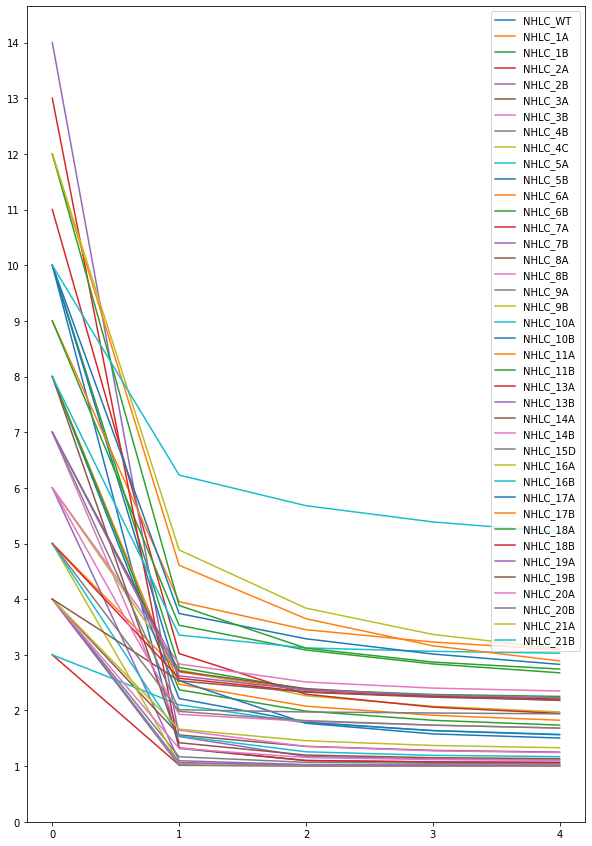

In [37]:
upperlim=int((reynidf.max(axis = 1)).max() + 1)
ax = reynidf.plot(figsize = (10,15), xticks=(0,1,2,3,4),yticks=(range(0,upperlim)))
ax.figure.savefig('figure.png')

['NHLC_WT', 'NHLC_1A', 'NHLC_1B', 'NHLC_2A', 'NHLC_2B', 'NHLC_3A', 'NHLC_3B', 'NHLC_4B', 'NHLC_4C', 'NHLC_5A', 'NHLC_5B', 'NHLC_6A', 'NHLC_6B', 'NHLC_7A', 'NHLC_7B', 'NHLC_8A', 'NHLC_8B', 'NHLC_9A', 'NHLC_9B', 'NHLC_10A', 'NHLC_10B', 'NHLC_11A', 'NHLC_11B', 'NHLC_13A', 'NHLC_13B', 'NHLC_14A', 'NHLC_14B', 'NHLC_15D', 'NHLC_16A', 'NHLC_16B', 'NHLC_17A', 'NHLC_17B', 'NHLC_18A', 'NHLC_18B', 'NHLC_19A', 'NHLC_19B', 'NHLC_20A', 'NHLC_20B', 'NHLC_21A', 'NHLC_21B']


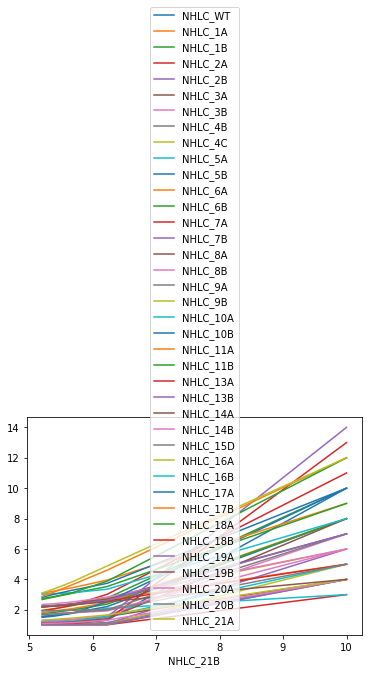

In [59]:
columnname=[]
for column in reynidft:
    columnname.append(column)
print(columnname)
    
reynidf.plot(x=column)
    